In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
# Student Performance Data Set https://archive.ics.uci.edu/dataset/320/student+performance
df = pd.read_csv('student-mat.csv', sep=';')


In [2]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [5]:
df_cat = df.select_dtypes(include = ['object'])
df_cat.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

Text(0, 0.5, 'Final Grade')

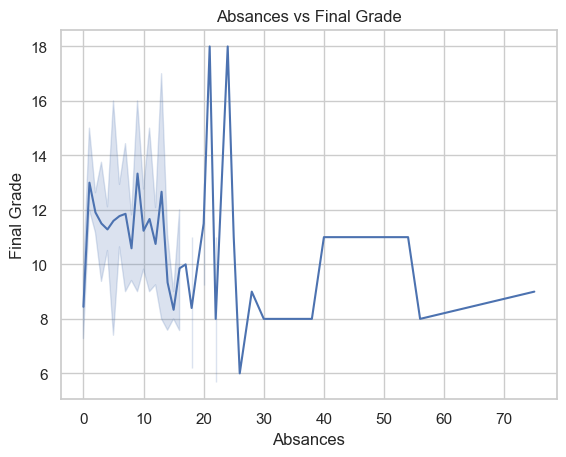

In [4]:
# Absences vs Final Grade Line Plot
sns.set(style="whitegrid")
ax = sns.lineplot(x="absences", y="G3", data=df)
ax.set_title('Absances vs Final Grade')
ax.set_xlabel('Absances')
ax.set_ylabel('Final Grade')



Text(0, 0.5, 'Free Time')

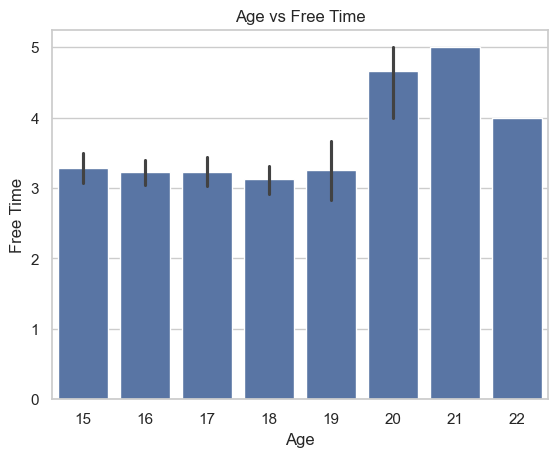

In [8]:
# Age vs Free Time Bar Plot
sns.set(style="whitegrid")
ax = sns.barplot(x="age", y="freetime", data=df)
ax.set_title('Age vs Free Time')
ax.set_xlabel('Age')
ax.set_ylabel('Free Time')


Text(0, 0.5, 'Count')

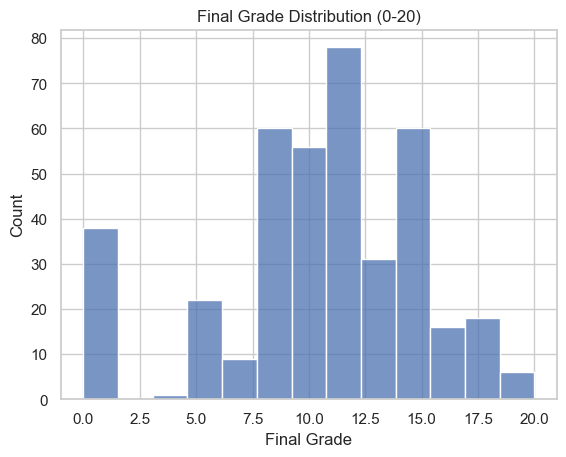

In [10]:
# Final Grade Distribution Histogram
sns.set(style="whitegrid")
ax = sns.histplot(x="G3", data=df)
ax.set_title('Final Grade Distribution (0-20)')
ax.set_xlabel('Final Grade')
ax.set_ylabel('Count')


C:\Users\sleep\AppData\Local\Temp\ipykernel_18996\3208560126.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['famsize_jitter'] = df['famsize'].replace({'GT3': 1, 'LE3': 0}).infer_objects(copy=False) + np.random.uniform(-0.4, 0.4, size=len(df))
C:\Users\sleep\AppData\Local\Temp\ipykernel_18996\3208560126.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['paid_jitter'] = df['paid'].replace({'yes': 1, 'no': 0}).infer_objects(copy=False) + np.random.uniform(-0.1, 0.1, size=len(df))


[Text(0, 0, 'no'), Text(0, 1, 'yes')]

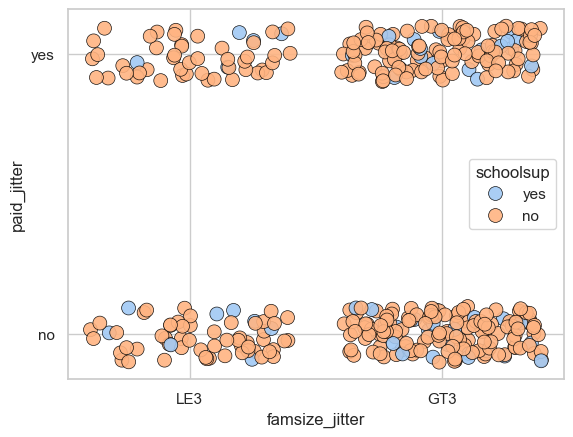

In [78]:
# Scatter Plot of Family Size vs Paid Classes
# Shift the points slightly to avoid overlap
df['famsize_jitter'] = df['famsize'].replace({'GT3': 1, 'LE3': 0}).infer_objects(copy=False) + np.random.uniform(-0.4, 0.4, size=len(df))
df['paid_jitter'] = df['paid'].replace({'yes': 1, 'no': 0}).infer_objects(copy=False) + np.random.uniform(-0.1, 0.1, size=len(df))


ax = sns.scatterplot(x="famsize_jitter", y="paid_jitter", hue='schoolsup', data=df, palette='pastel', alpha=0.9, s=100, edgecolor='black', linewidth=0.5, legend='full', zorder=2, marker='o')

# Setting the original labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['LE3', 'GT3'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['no', 'yes'])

Text(0, 0.5, 'Density')

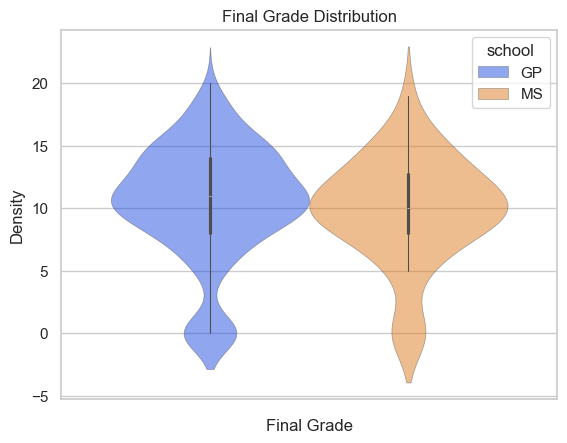

In [81]:
# Final Grade Distribution Violin Plot by School
ax = sns.violinplot(y="G3", data=df, linewidth=0.5, hue="school", palette='bright', alpha=0.5)
ax.set_title('Final Grade Distribution')
ax.set_xlabel('Final Grade')
ax.set_ylabel('Density')


Text(0, 0.5, 'Density')

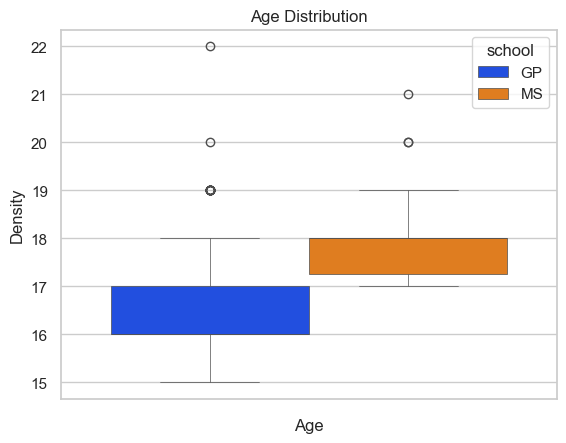

In [83]:
# Age Distribution Box Plot by School
ax = sns.boxplot(y="age", data=df, linewidth=0.5, hue="school", palette='bright')
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Density')

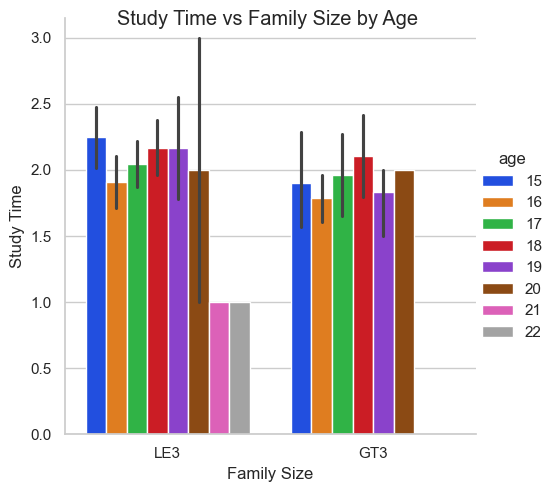

In [94]:
# cat plot of Study Time vs Family Size by Age
ax = sns.catplot(x="famsize", y="studytime", hue="age", data=df, kind="bar", palette='bright')
ax.set_axis_labels("Family Size", "Study Time")
ax.fig.suptitle('Study Time vs Family Size by Age')
ax.set_xticklabels(['LE3', 'GT3'])


Text(0, 0.5, 'Density')

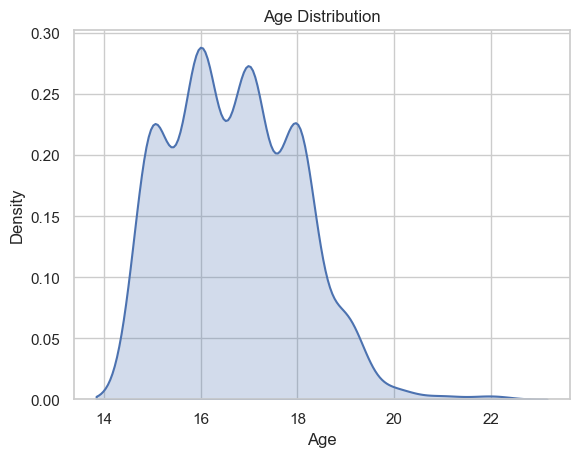

In [109]:
ax = sns.kdeplot(df['age'], cmap='viridis', fill=True, thresh=0, levels=100, linewidths=1.5)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Density')


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

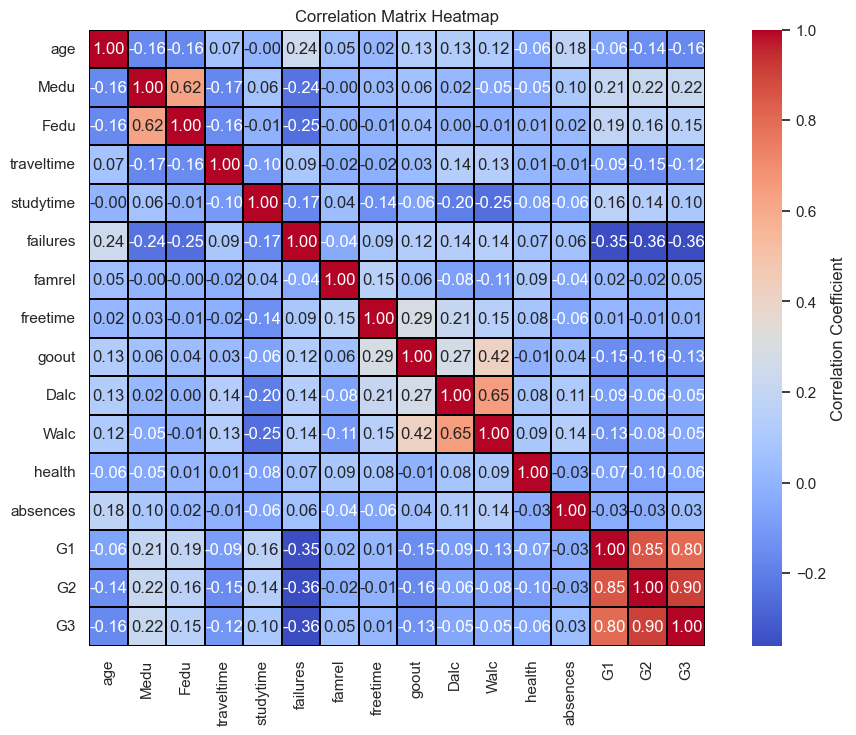

In [124]:
# Correlation Matrix Heatmap
sns.set_theme(style="whitegrid", rc={'figure.figsize':(12, 8)})
ax = sns.heatmap(df_num.corr(),
                  annot=True,
                    cmap='coolwarm',
                    fmt='.2f',
                    linewidths=0.1,
                    linecolor='black',
                    square=True,
                    cbar_kws={'label': 'Correlation Coefficient'},
                    xticklabels=df_num.columns,
                    yticklabels=df_num.columns)
ax.set_title('Correlation Matrix Heatmap')


Text(0.5, 1.02, 'Pairplot of Numerical Features')

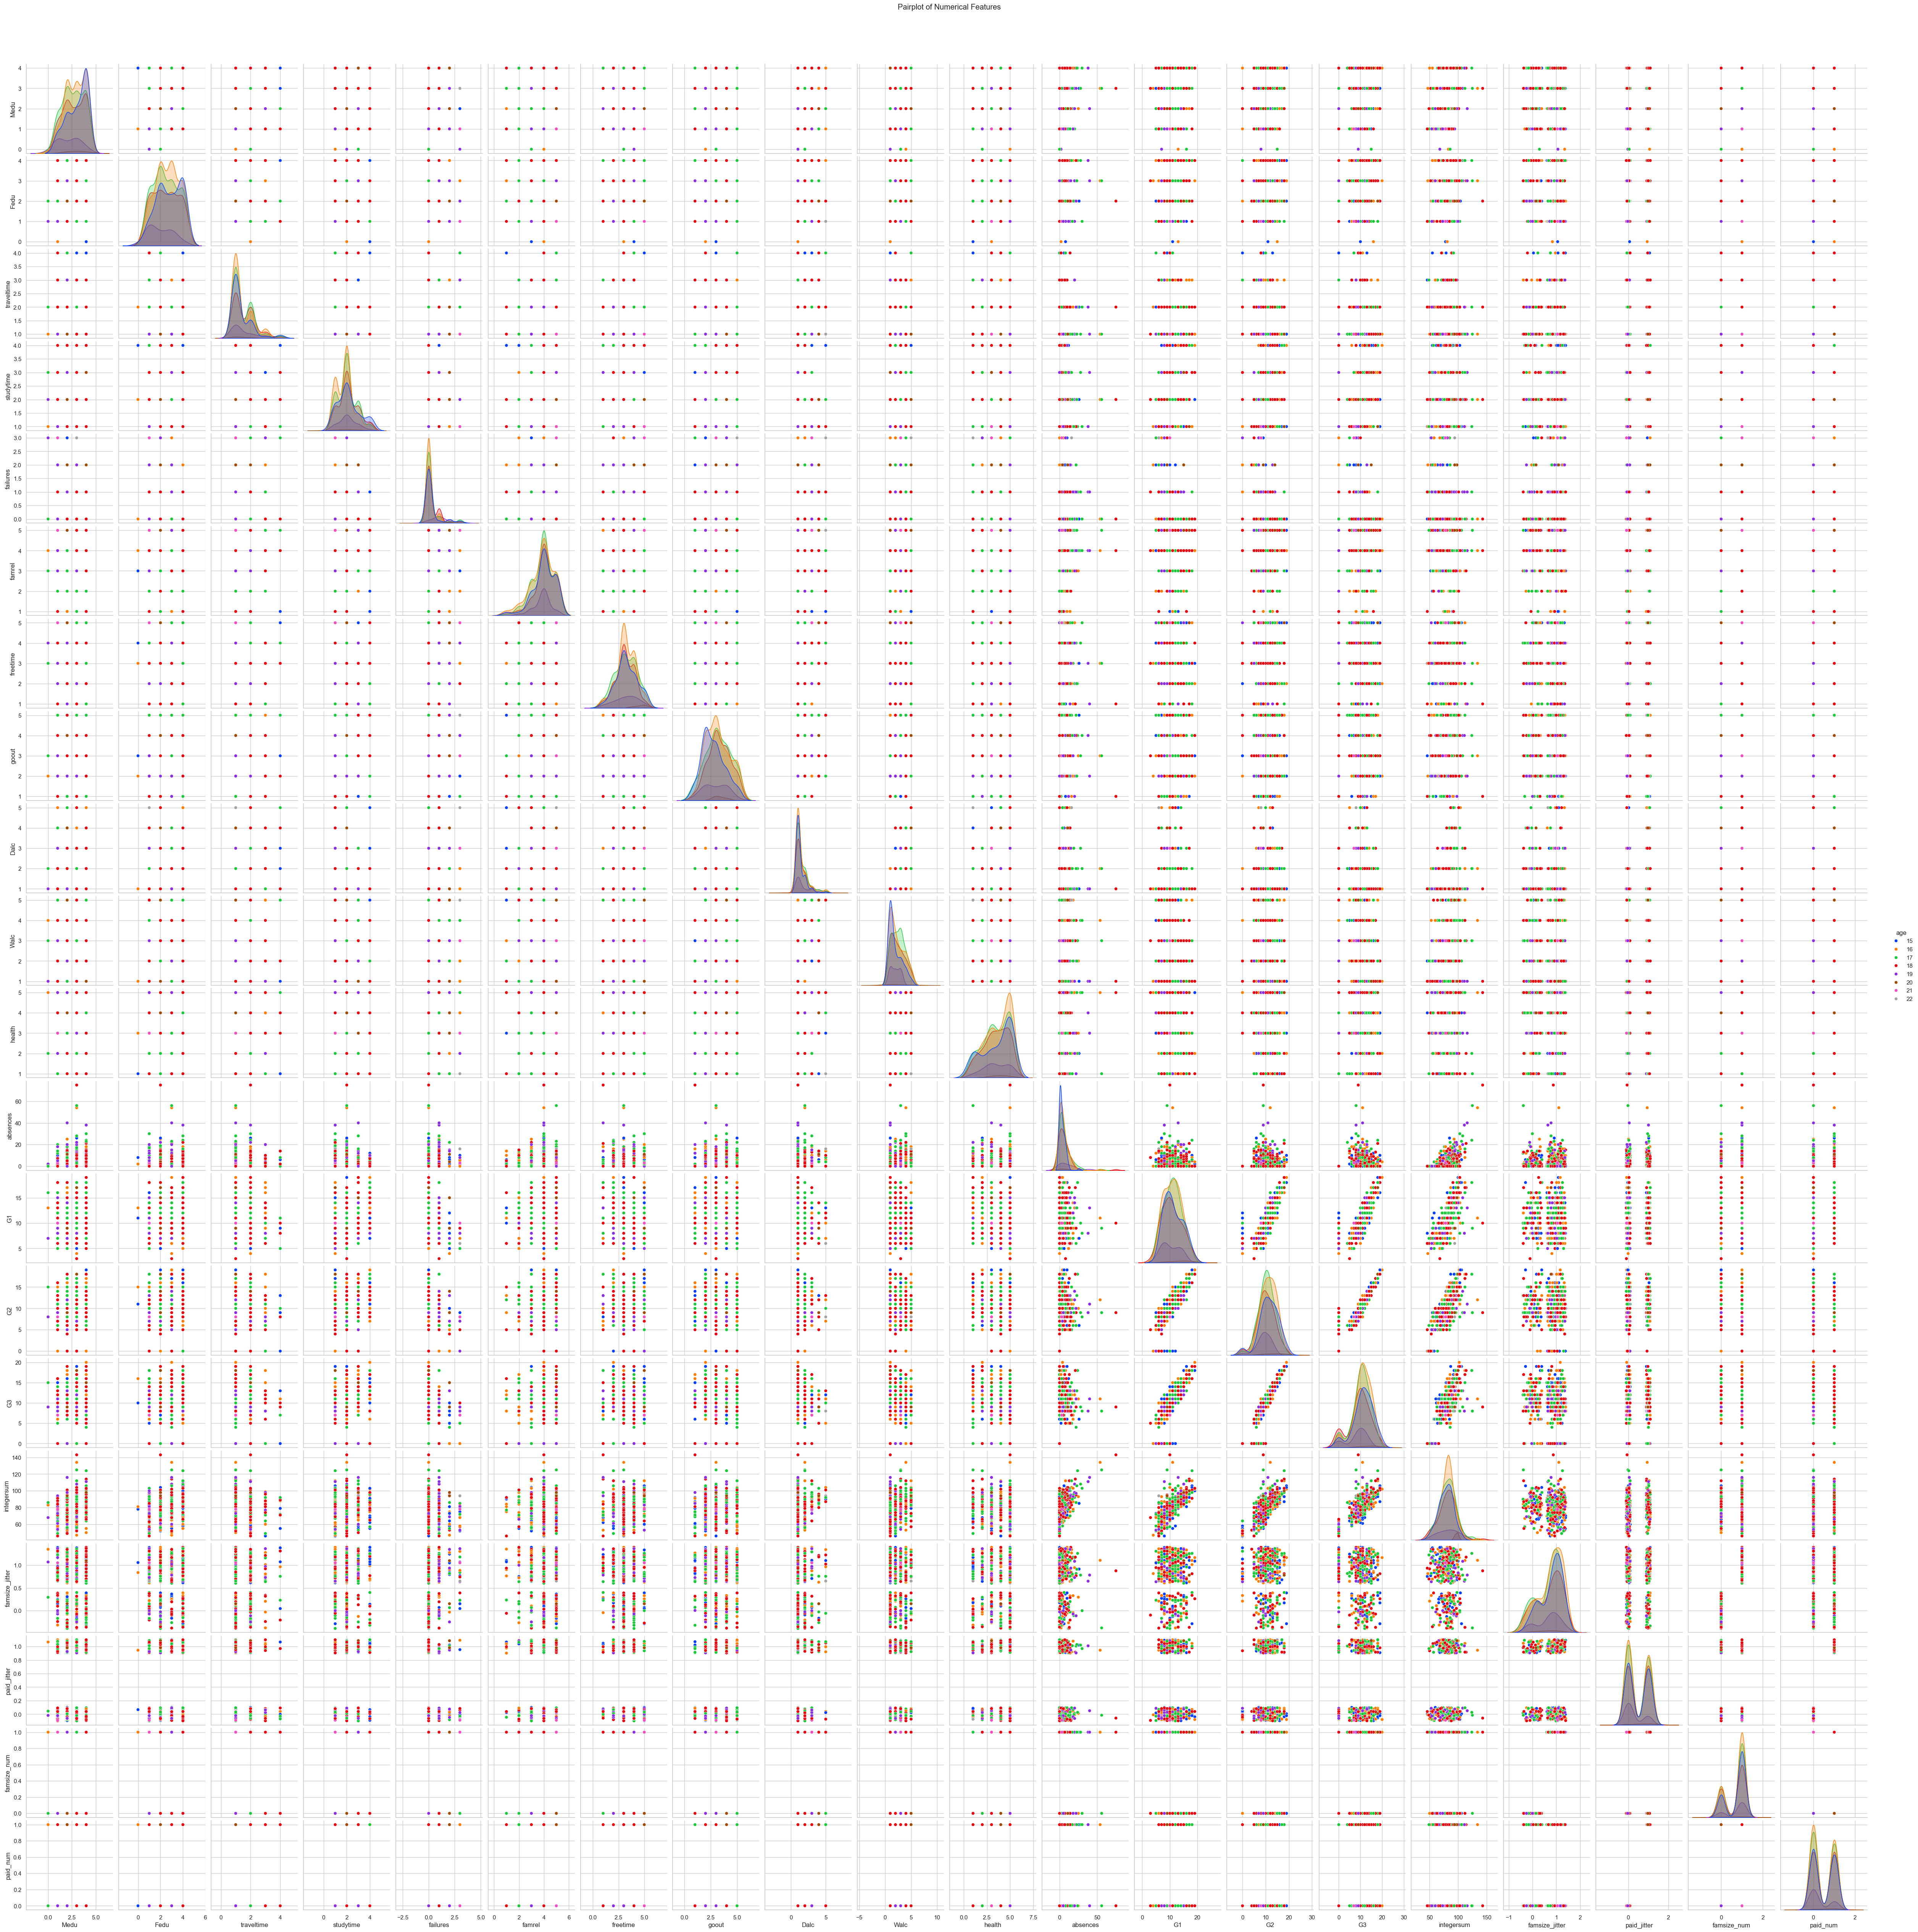

In [130]:
# Pairplot of Numerical Features
ax = sns.pairplot(df_num, diag_kind='kde', kind='scatter', hue='age', palette='bright')
ax.fig.suptitle('Pairplot of Numerical Features', y=1.02)


Text(0.5, 1.02, 'Final Grade Distribution by School')

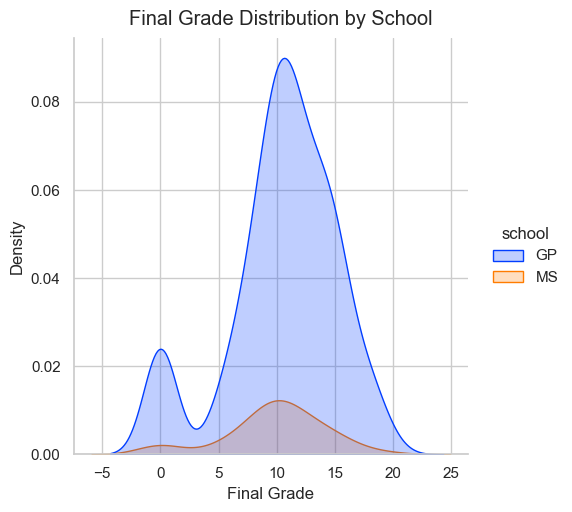

In [132]:
# Final Grade Distribution by School
ax = sns.displot(df, x="G3", hue="school", kind="kde", fill=True, palette='bright')
ax.set_axis_labels("Final Grade", "Density")
ax.fig.suptitle('Final Grade Distribution by School', y=1.02)
